<a href="https://colab.research.google.com/github/RagilAkbari/Seattle-Weather-data/blob/main/ann_relu_sigmo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving seattleWeather_1948-2017 (1).csv to seattleWeather_1948-2017 (1).csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['seattleWeather_1948-2017 (1).csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


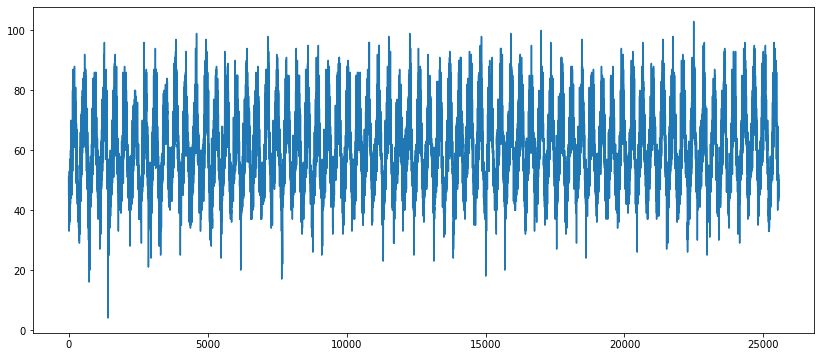

In [5]:
#eda

plt.figure(figsize=(14,6))
df['TMAX'].plot()

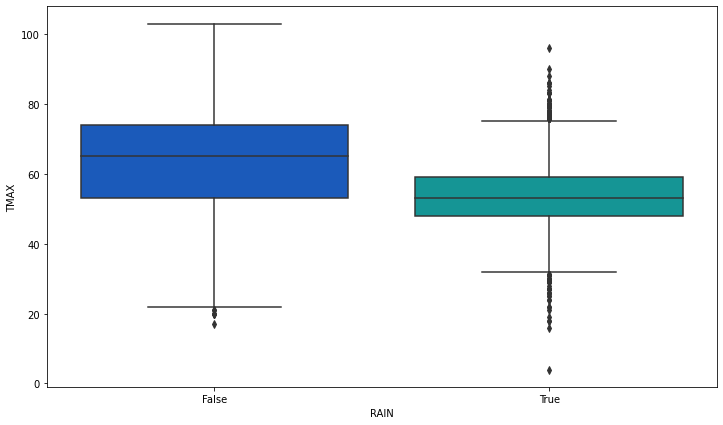

In [6]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='RAIN',y='TMAX',data=df,palette='winter')

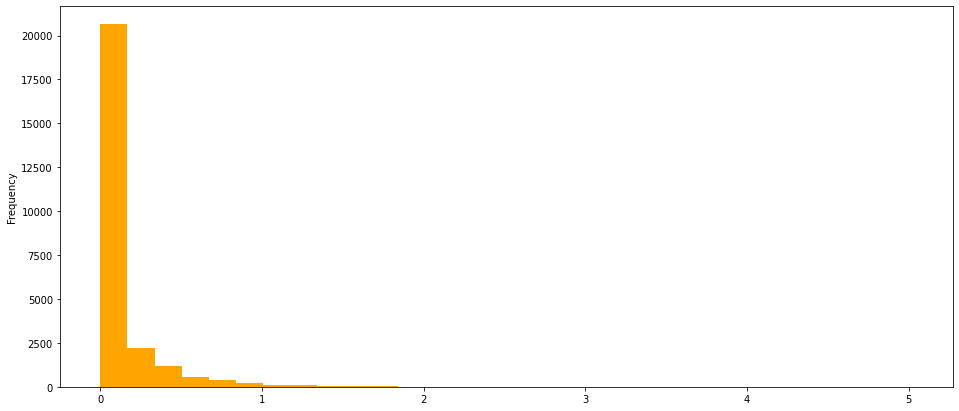

In [7]:
df['PRCP'].plot(kind='hist',bins=30,color='orange',figsize= (16,7))

In [8]:
#convert kolom Rain True = 1

df['rain']=[1 if i==True else 0 for i in df['RAIN']]

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN', 'rain'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
 5   rain    25551 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 1.2+ MB


In [12]:
df.dropna(inplace=True)

In [13]:
X=df[['PRCP', 'TMAX', 'TMIN']]
y=df[['rain']]

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=41)

In [15]:
#normalisasi mjd nilai X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [16]:
#model ANN
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [19]:
ann  = Sequential()
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu', input_dim=3))
ann.add(Dense(units= 16,kernel_initializer= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [22]:
ann.fit(xtrain,ytrain, batch_size=10, epochs=10,verbose= 1)

Epoch 1/10
2044/2044 [==============================] - 3s 1ms/step - loss: 0.0969 - accuracy: 0.8777
Epoch 2/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0098 - accuracy: 0.9928
Epoch 3/10
2044/2044 [==============================] - 2s 1ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 4/10
2044/2044 [==============================] - 2s 1ms/step - loss: 5.2938e-04 - accuracy: 0.9997
Epoch 5/10
2044/2044 [==============================] - 2s 1ms/step - loss: 6.7837e-05 - accuracy: 1.0000
Epoch 6/10
2044/2044 [==============================] - 2s 1ms/step - loss: 8.8478e-05 - accuracy: 0.9999
Epoch 7/10
2044/2044 [==============================] - 2s 1ms/step - loss: 1.0220e-05 - accuracy: 1.0000
Epoch 8/10
2044/2044 [==============================] - 2s 1ms/step - loss: 7.4222e-06 - accuracy: 1.0000
Epoch 9/10
2044/2044 [==============================] - 2s 1ms/step - loss: 4.4114e-06 - accuracy: 1.0000
Epoch 10/10
2044/2044 [==============================] - 2

In [23]:
Y_pred = ann.predict(xtest)
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred]
print(Y_pred)

[0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, Y_pred)
print(cm)

[[2928    0]
 [   0 2182]]
